In [1]:
import torch
from torch.autograd import Variable
import random
import matplotlib.pyplot as plt

## 简单的模型

In [2]:
def out_plot(x, a_item, a_grad, loss_item):
    plt.figure(figsize=(5,12),)
    plt.subplot(311)
    plt.plot(list(range(len(x))), a_item);
    plt.xlabel('epoch');
    plt.ylabel('a');
    plt.subplot(312)
    plt.plot(list(range(len(x))), a_grad);
    plt.xlabel('epoch');
    plt.ylabel('a_grad');
    plt.subplot(313)
    plt.plot(list(range(len(x))), loss_item);
    plt.xlabel('epoch');
    plt.ylabel('loss');

$$y=2 x + random$$
$$loss = (a x - y)^2$$

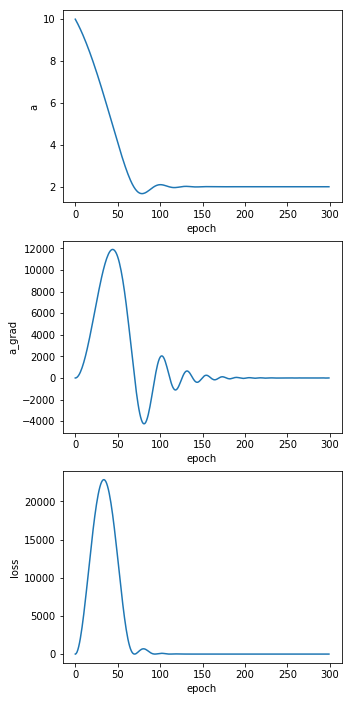

In [3]:
x = list(range(300))
y = list(map(lambda x: 2*x + random.random()*0.01,x))

# 变量
a = torch.tensor([10.], requires_grad=True)
# 优化器
optimizer = torch.optim.Adam(params=[a], lr=0.1)

a_item = []
a_grad = []
loss_item = []
for i in range(len(x)):
    out = a * x[i]
    loss = torch.pow(out-y[i],2)
    loss_item.append(loss.item())
    # 优化器梯度清除
    optimizer.zero_grad()
    # 反向传播
    loss.backward()
    a_grad.append(a.grad.item())
    # 优化更新
    optimizer.step()
    a_item.append(a.item())
out_plot(x, a_item, a_grad, loss_item)

## normalize

In [4]:
n = torch.tensor([[1,2,3,4],[4,3,2,1.]])
n.shape

torch.Size([2, 4])

In [5]:
torch.nn.BatchNorm1d(4,affine=False,eps=0,track_running_stats=False)(n)

tensor([[-1., -1.,  1.,  1.],
        [ 1.,  1., -1., -1.]])

In [6]:
torch.nn.LayerNorm(4,eps=0,elementwise_affine=False)(n)

tensor([[-1.3416, -0.4472,  0.4472,  1.3416],
        [ 1.3416,  0.4472, -0.4472, -1.3416]])

In [7]:
mean = torch.mean(n,dim=0, keepdim=True)
print(mean)
std = torch.std(n,dim=0, keepdim=True)
print(std)

tensor([[2.5000, 2.5000, 2.5000, 2.5000]])
tensor([[2.1213, 0.7071, 0.7071, 2.1213]])


In [8]:
(n - mean)/std

tensor([[-0.7071, -0.7071,  0.7071,  0.7071],
        [ 0.7071,  0.7071, -0.7071, -0.7071]])

In [9]:
mean_l = torch.mean(n,dim=1, keepdim=True)
print(mean_l)
std_l = torch.std(n,dim=1, keepdim=True)
print(std_l)

tensor([[2.5000],
        [2.5000]])
tensor([[1.2910],
        [1.2910]])


In [10]:
(n - mean_l)/std_l

tensor([[-1.1619, -0.3873,  0.3873,  1.1619],
        [ 1.1619,  0.3873, -0.3873, -1.1619]])

### Normalization

In [11]:
s = torch.tensor([[0.6,-0.8,0.5],[-1.3,1.9,0.2]])
s

tensor([[ 0.6000, -0.8000,  0.5000],
        [-1.3000,  1.9000,  0.2000]])

In [12]:
s.mean()

tensor(0.1833)

In [13]:
s.std(unbiased=False)

tensor(1.0319)

In [14]:
nor_i = torch.tensor([0.4, -0.6, 0.7])
nor_i

tensor([ 0.4000, -0.6000,  0.7000])

In [15]:
(nor_i - s.mean())/s.std(unbiased=False)

tensor([ 0.2100, -0.7592,  0.5007])

In [16]:
a = ['a', 'b', 'c']
a

['a', 'b', 'c']

In [17]:
list(zip(range(len(a)),a))

[(0, 'a'), (1, 'b'), (2, 'c')]

In [18]:
nor_i-s.mean()

tensor([ 0.2167, -0.7833,  0.5167])

In [19]:
print(torch.std.__doc__)


.. function:: std(input, unbiased=True) -> Tensor

Returns the standard-deviation of all elements in the :attr:`input` tensor.

If :attr:`unbiased` is ``False``, then the standard-deviation will be calculated
via the biased estimator. Otherwise, Bessel's correction will be used.

Args:
    input (Tensor): the input tensor
    unbiased (bool): whether to use the unbiased estimation or not

Example::

    >>> a = torch.randn(1, 3)
    >>> a
    tensor([[-0.8166, -1.3802, -0.3560]])
    >>> torch.std(a)
    tensor(0.5130)

.. function:: std(input, dim, keepdim=False, unbiased=True, out=None) -> Tensor

Returns the standard-deviation of each row of the :attr:`input` tensor in the
dimension :attr:`dim`. If :attr:`dim` is a list of dimensions,
reduce over all of them.


If :attr:`keepdim` is ``True``, the output tensor is of the same size
as :attr:`input` except in the dimension(s) :attr:`dim` where it is of size 1.
Otherwise, :attr:`dim` is squeezed (see :func:`torch.squeeze`), resulting i